# M348 Code tests

Notebook to test package loads and simple functionality.

When the notebook has loaded, wait for the kernel indicator (top right on the notebook toolbar) to show an empty circle (○) and indicate the `R (webR)` kernel. *If the kernel name shows as `Pyodide`, click on that kernel name and select `R (webR)`.*

When the kernel is ready, run cells one at a time by clicking in the code cell below and run it either by `shift-Return` or clicking the play button (⏵) in the notebook toolbar. (Alternatively, run all cells from the *Run* menu, option *Run All Cells*.)

Keep running cells till you get to the end (you can also "run" over the markdown cells; each run cell should move the selection onto the next cell).

If each cell indicator to the left of the cell goes green, that is success. If the cell indicator to the left goes pink, there was an error.

In [22]:
# Edit this cell before running it if you are using a port number other than 8348
PORTNUMBER <- 8348

## Package M348

The core package used by many of the M348 notebooks. This package includes several functions and data packages used in the module. Loading the packahe also loads several utilities that help ensure that *all* R notebooks function correctly in the JupyterLite environment.

In [23]:
# Data package load from M348 test
data('childMeasurements')

In [24]:
# Data view - should show six rows of data
head(childMeasurements)

  count     ethnicity     ageGroup obese
1  3537         Asian 4 to 5 years   yes
2  2607         Black 4 to 5 years   yes
3  2194         Mixed 4 to 5 years   yes
4 24240         White 4 to 5 years   yes
5  1062 Chinese/other 4 to 5 years   yes
6  5764       Unknown 4 to 5 years   yes

In [25]:
# Load some more data
data(ouStudents)

# Fit a model to these data and show a summary of the results
modelFit <- glm(modResult ~ contAssScore + bestPrevModScore + age, family="binomial", data = ouStudents)
summary(modelFit)



Call:
glm(formula = modResult ~ contAssScore + bestPrevModScore + age, 
    family = "binomial", data = ouStudents)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -6.88711    1.03426  -6.659 2.76e-11 ***
contAssScore      0.12801    0.01195  10.716  < 2e-16 ***
bestPrevModScore  0.04175    0.01135   3.678 0.000235 ***
age              -0.03184    0.01174  -2.711 0.006702 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 678.51  on 1795  degrees of freedom
Residual deviance: 389.44  on 1792  degrees of freedom
AIC: 397.44

Number of Fisher Scoring iterations: 8


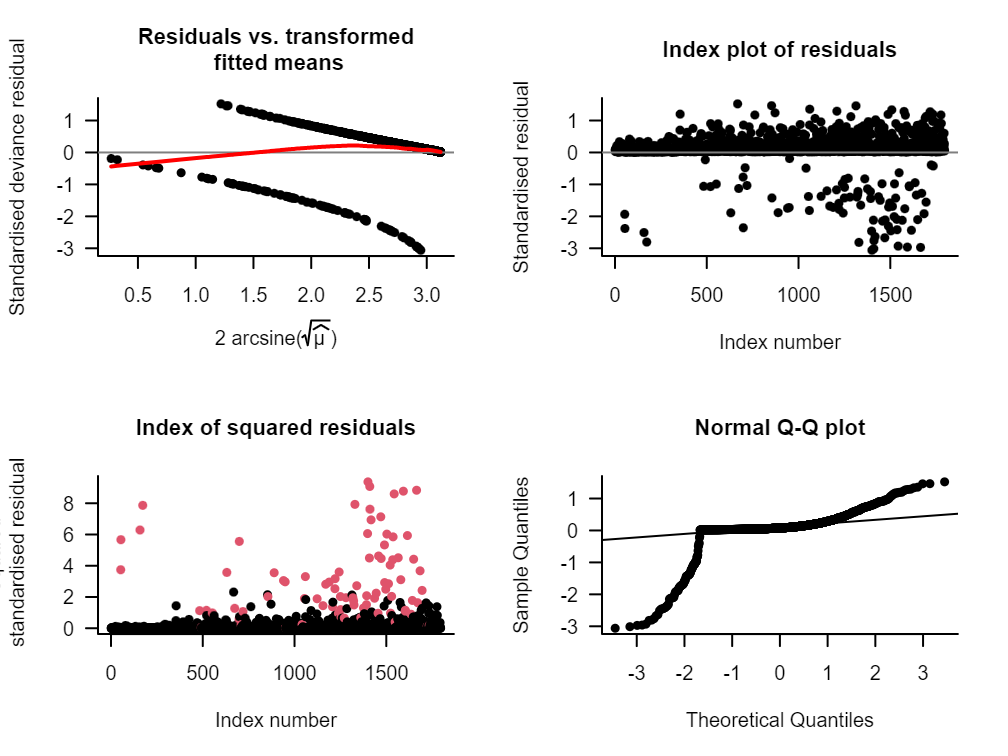

In [26]:
# Produce diagnostic plots for the fitted model
glmResidPlot(modelFit)

## `plm`

Test loading in the package:

In [27]:
library(plm)

In [28]:
library(plm)
data("EmplUK", package="plm")
data("Grunfeld", package="plm")

head(Grunfeld)


  firm year   inv  value capital
1    1 1935 317.6 3078.5     2.8
2    1 1936 391.8 4661.7    52.6
3    1 1937 410.6 5387.1   156.9
4    1 1938 257.7 2792.2   209.2
5    1 1939 330.8 4313.2   203.4
6    1 1940 461.2 4643.9   207.2

In [29]:
# Try a panel dataframe
E <- pdata.frame(EmplUK, index=c("firm","year"), drop.index=TRUE, row.names=TRUE)
head(E)

       sector   emp    wage capital   output
1-1977      7 5.041 13.1516  0.5894  95.7072
1-1978      7 5.600 12.3018  0.6318  97.3569
1-1979      7 5.015 12.8395  0.6771  99.6083
1-1980      7 4.715 13.8039  0.6171 100.5501
1-1981      7 4.093 14.2897  0.5076  99.5581
1-1982      7 3.166 14.8681  0.4229  98.6151

## `urca` package

Test loading package in:

In [30]:
library(urca)

In [31]:
# Test a function loaded from urca
set.seed(123)
time_series <- cumsum(rnorm(100))  # Random walk

# Step 3: Perform the Augmented Dickey-Fuller (ADF) test
adf_test <- ur.df(time_series, type = "drift", lags = 2)

# Step 4: View the test results
summary(adf_test)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.17649 -0.60175 -0.05849  0.62378  2.32200 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.167837   0.142382   1.179    0.241
z.lag.1     -0.029755   0.046537  -0.639    0.524
z.diff.lag1 -0.001686   0.109385  -0.015    0.988
z.diff.lag2 -0.079112   0.109591  -0.722    0.472

Residual standard error: 0.919 on 93 degrees of freedom
Multiple R-squared:  0.01579,	Adjusted R-squared:  -0.01595 
F-statistic: 0.4975 on 3 and 93 DF,  p-value: 0.6849


Value of test-statistic is: -0.6394 0.76 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


## `nlme` package

Load package:

In [32]:
library(nlme)

The following code cell should generate a graphical chart that is is rendered as part of the cell output.

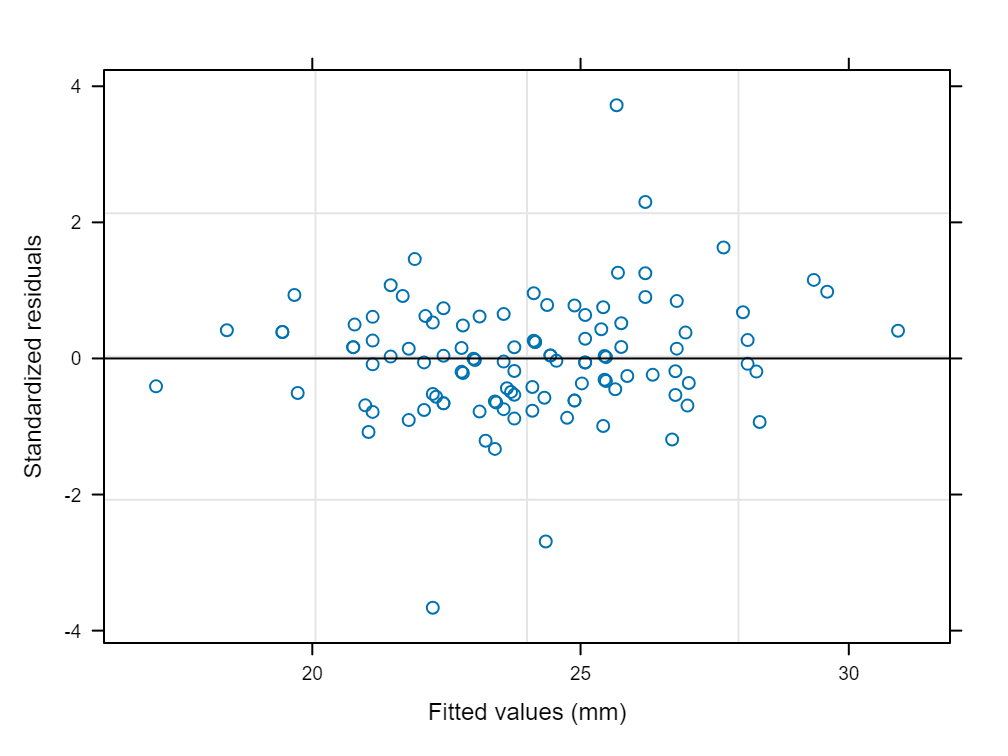

In [33]:
library(nlme)

# Load the built-in 'Orthodont' dataset
data("Orthodont")

# Fit a linear mixed-effects model using the lme() function
# Response variable: distance (the response is dental measurement)
# Fixed effect: age (predictor)
# Random effect: intercept for each Subject
lme_model <- lme(distance ~ age, random = ~ 1 | Subject, data = Orthodont)

# Plot residuals to assess the model fit
plot(lme_model)

## Loading Data Files

Files can be loaded in from a variety of locations, including browser storage.

For the desktop run installation, files can also be read from the shared `M348-24J` directory in the user's home directory on the host computer.

In [34]:
# Test loading from browser storage
data <- read.csv("tokyo2020medals.csv")
data

File not found in shared directory 'M348-24J' in your desktop computer user directory

Trying local browser storage...

File not found in browser storage 



NULL

In [35]:
# Test loading from shared directory (desktop run installation only)
# Ensure that a simple CSV doc is available as: USERHOME_DIRECTORY/M348-24J/jl_distro_data_test.csv
data <- read.csv("jl_distro_data_test.csv")
data

File not found in shared directory 'M348-24J' in your desktop computer user directory

Trying local browser storage...

File not found in browser storage 



NULL